In [2]:
pip install pandas

In [3]:
from pandas import read_csv
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
data = read_csv(path, header = None)
print(data.nunique())

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


In [4]:
unique_data = data.nunique()
to_del = [i for i,v in enumerate(unique_data) if v == 1]
print(to_del)

[22]


In [6]:
data.drop(to_del, axis = 1, inplace = True)
print(data.shape)

(937, 49)


In [8]:
pip install sklearn


Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


      0      1        2       3    4           5      6      7        8   \
0      1   2558  1506.09  456.63   90   6395000.0  40.88   7.89  29780.0   
1      2  22325    79.11  841.03  180  55812500.0  51.11   1.21  61900.0   
2      3    115  1449.85  608.43   88    287500.0  40.42   7.34   3340.0   
3      4   1201  1562.53  295.65   66   3002500.0  42.40   7.97  18030.0   
4      5    312   950.27  440.86   37    780000.0  41.43   7.03   3350.0   
..   ...    ...      ...     ...  ...         ...    ...    ...      ...   
932  200     12    92.42  364.42  135     97200.0  59.42  10.34    884.0   
933  201     11    98.82  248.64  159     89100.0  59.64  10.18    831.0   
934  202     14    25.14  428.86   24    113400.0  60.14  17.94    847.0   
935  203     10    96.00  451.30   68     81000.0  59.90  15.01    831.0   
936  204     11     7.73  235.73  135     89100.0  61.82  12.24    831.0   

       9   ...       40        41       42       43     44  45        46  \
0    0.19  

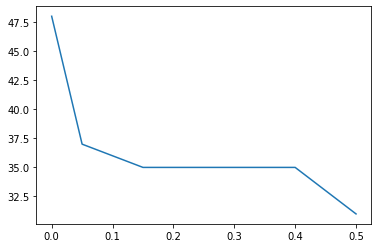

In [13]:
# explore the effect of the variance thresholds on the number of selected features
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
print(df)
# split data into inputs and outputs
data = df.values
#print(data)
X = data[:, :-1]
y = data[:, -1]
print(X,y)
print(X.shape, y.shape)
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)
# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)

In [15]:
# delete rows of duplicate data from the dataset
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
# load the dataset
df = read_csv(path, header=None)
print(df.shape)
# delete duplicate rows
df.drop_duplicates(inplace=True)
print(df.shape)

(150, 5)
(147, 5)


In [16]:
# locate rows of duplicate data
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
# load the dataset
df = read_csv(path, header=None)
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

True
       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica
